In [1]:
# https://www.tensorflow.org/tutorials/quickstart/beginner?hl=pt-br
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.6.0


In [2]:
# http://yann.lecun.com/exdb/mnist/
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


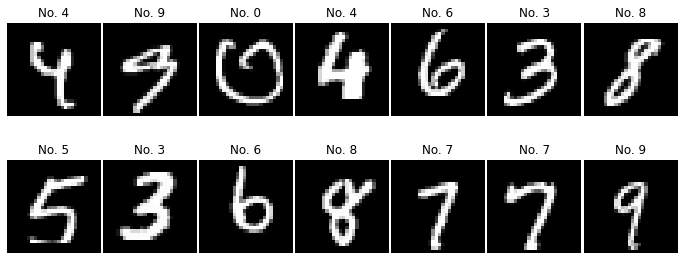

In [3]:
# display 14 random images from the training set
import numpy as np
np.random.seed(123)

rand_14 = np.random.randint(0, X_train.shape[0],14)
sample_digits = X_train[rand_14]
sample_labels = y_train[rand_14]
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()

In [4]:
# re-scale the image data to values between (0.0,1.0]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [5]:
# Add a channels dimension
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]
X_train.shape

(60000, 28, 28, 1)

In [6]:
y_train = y_train.reshape(-1,1)
y_train.shape

(60000, 1)

In [7]:
from sklearn.preprocessing import OneHotEncoder
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_train)
y.shape

(60000, 10)

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                27050     
Total params: 27,210
Trainable params: 27,210
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 35s 4ms/step - loss: 0.5276 - accuracy: 0.8567 - val_loss: 0.3023 - val_accuracy: 0.9137
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3053 - accuracy: 0.9111 - val_loss: 0.2692 - val_accuracy: 0.9217
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2730 - accuracy: 0.9206 - val_loss: 0.2446 - val_accuracy: 0.9302


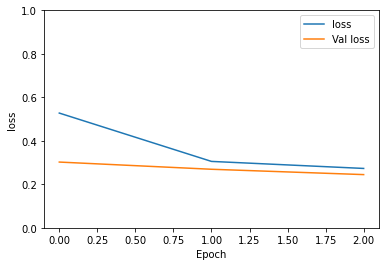

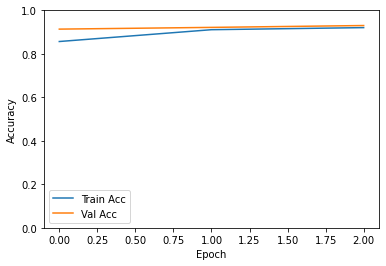

In [17]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val loss')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Acc')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Acc')
    plt.ylim([0,1])
    plt.legend()
    plt.show()


plot_history(history)


In [13]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: {}".format(scores[1]))


313/313 [==============================] - 1s 3ms/step - loss: 0.2446 - accuracy: 0.9302
Accuracy: 0.9301999807357788


In [14]:
predictions = model.predict(X_test)
print(predictions.shape)


(10000, 10)


In [15]:
pred = np.argmax(predictions, axis=1)
pred.shape

(10000,)

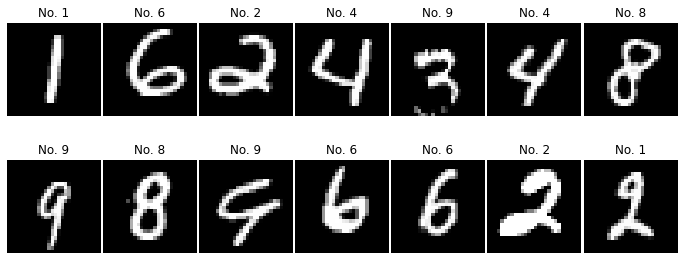

In [16]:
# display 14 random images from the training set
import numpy as np
np.random.seed(42)
X_test = X_test.reshape(-1, 28, 28)
rand_14 = np.random.randint(0, X_test.shape[0],14)
#rand_14 = range(14)
sample_digits = X_test[rand_14]
sample_labels = pred[rand_14]
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()